# Opgave 1

Importer pakker

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from Firsttry import *

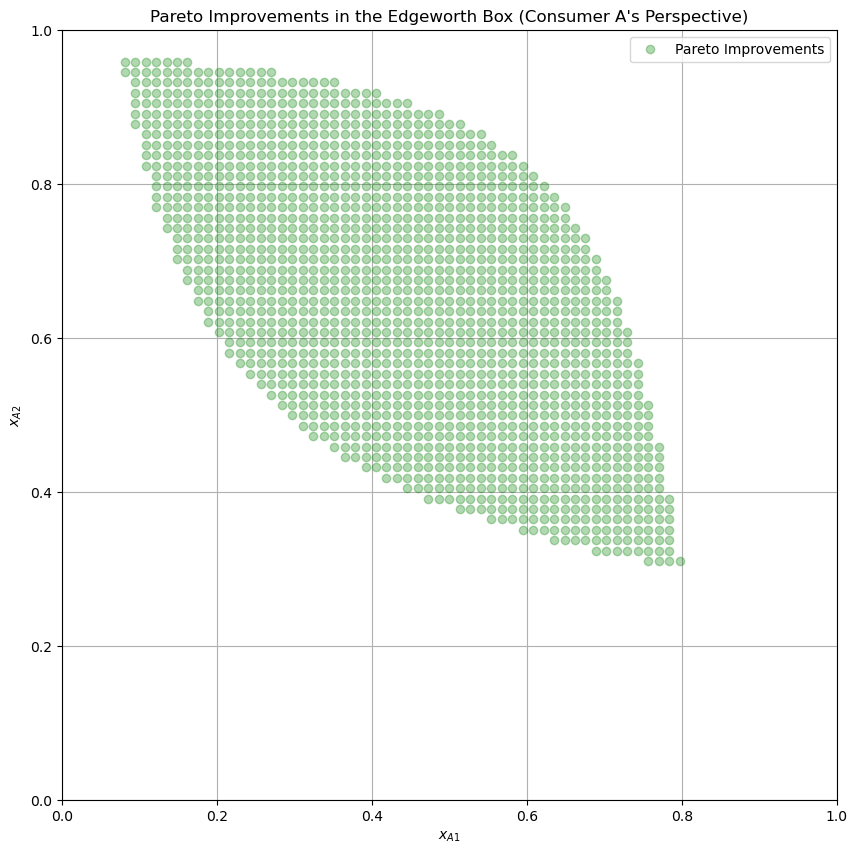

In [60]:
# Parameters
alpha = 1/3
beta = 2/3
N = 75

# Store Pareto improvements
pareto_improvements = []

# Check for Pareto improvements
for demand_x1_A in np.linspace(0, 1, N):
    for demand_x2_A in np.linspace(0, 1, N):
        x_B1 = 1 - x_A1
        x_B2 = 1 - x_A2
        if u_A(x_A1, x_A2) >= u_A(0.8, 0.3) and u_B(x_B1, x_B2) >= u_B(0.2, 0.7):
            pareto_improvements.append((x_A1, x_A2))

# Convert to numpy array for plotting
pareto_improvements = np.array(pareto_improvements)

# Plotting
plt.figure(figsize=(10, 10))
plt.plot(pareto_improvements[:, 0], pareto_improvements[:, 1], 'go', label='Pareto Improvements', alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')
plt.title('Pareto Improvements in the Edgeworth Box (Consumer A\'s Perspective)')
plt.legend()
plt.grid(True)
plt.show()
